In [1]:
import pandas as pd

In [2]:
# Load datasets
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

In [3]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Add labels
true_news['label'] = 1  # 1 for real news
fake_news['label'] = 0   # 0 for fake news

In [6]:
# Combine datasets
df = pd.concat([true_news, fake_news], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Class Distribution (0=Fake, 1=Real)')

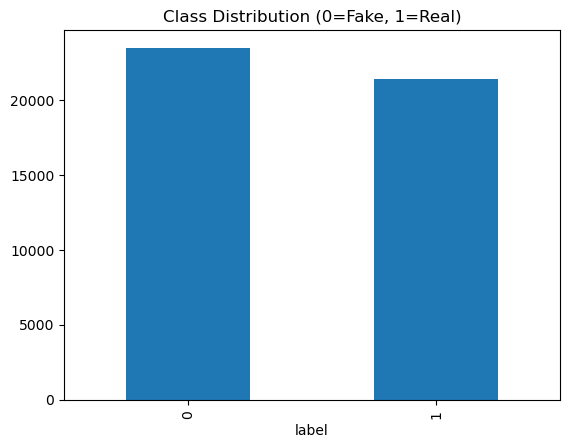

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check class balance
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0=Fake, 1=Real)")

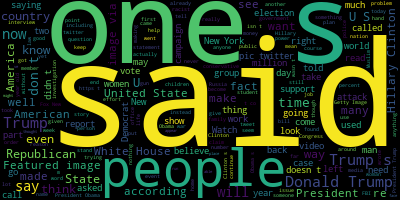

In [8]:
# Word clouds for fake vs real news
real_text = " ".join(df[df['label']==1]['text'])
fake_text = " ".join(df[df['label']==0]['text'])

WordCloud().generate(real_text).to_image()  # Real news word cloud
WordCloud().generate(fake_text).to_image() # Fake news word cloud

Data Preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special chars
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in stop])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

Feature Engineering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model Development

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

Accuracy: 0.9981069042316258
Confusion Matrix:
 [[4705   10]
 [   7 4258]]


Model Evaluation

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

# Feature importance (for Random Forest)
importances = model.feature_importances_
feature_names = tfidf.get_feature_names_out()
pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



,feature,importance
3799,reuters,0.188790
3899,said,0.052798
4787,via,0.025841
2206,image,0.018061
2854,minister,0.017473
4855,washington,0.014909
4534,thursday,0.009928
2511,know,0.009332
4652,tuesday,0.008716
4220,spokesman,0.008100


In [14]:
# Save model
import joblib
joblib.dump(model, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [16]:
import pickle
with open('fake_news_model1.pkl', 'wb') as file:
    pickle.dump(model, file)